<a href="https://colab.research.google.com/github/Giftcomfort/OOU_CSC309_Artificial_Intelligence/blob/main/notebooks/CSC309_Week04_Astar_CA1_Student_Centred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC309 – Artificial Intelligence  
**Week 4 Lab:** Heuristic Search (A*) — Continuous Assessment 1

**Instructor:** Dr Sakinat Folorunso  

**Title:** Associate Professor of AI Systems and FAIR Data **Department:** Computer Sciences, Olabisi Onabanjo University, Ago-Iwoye, Ogun State, Nigeria

**Course Code:** CSC 309

**Mode:** Student‑centred, hands‑on in Google Colab

> Every code cell is commented line‑by‑line so you can follow the logic precisely.

## How to use this notebook
1. Start with the **Group Log** and **Do Now**.  
2. Run the **Setup** cell once.  
3. Work through **Tasks**. Edit only cells marked **`# TODO(Student)`**.  
4. Use **Quick Checks** to test your understanding.  
5. Finish with the **Reflection**. If you finish early, try the **Extensions**.

In [7]:
#@title 🧑🏽‍🤝‍🧑🏾 Group Log (fill before you start)
# The '#@param' annotations create form fields in Colab for easy input.

group_members = "Ozakpolor Godgift, Ngozi Ugbeh, Ridwan,Sijuola"  #@param {type:"string"}  # Names of teammates
roles_notes = "Driver/Navigator, decisions, questions"  #@param {type:"string"}  # Short working notes

print("👥 Group:", group_members)        # Echo the group list for confirmation
print("📝 Notes:", roles_notes)          # Echo the notes so they're preserved in output

👥 Group: Ozakpolor Godgift, Ngozi Ugbeh, Ridwan,Sijuola
📝 Notes: Driver/Navigator, decisions, questions


### Learning Objectives
- Implement **A\*** on grid maps.  
- Design and justify **admissible** heuristics.  
- Measure explored nodes vs. heuristic choice.

In [8]:
#@title 🔧 Setup
# Install (if needed) and import minimal libraries.
import sys, subprocess                                           # System + pip access
def pip_install(pkgs):
    for p in pkgs:
        try: __import__(p.split("==")[0])                        # Try to import
        except Exception:
            subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", p])  # Otherwise install
pip_install(["numpy", "matplotlib"])                             # NumPy + Matplotlib are sufficient

import numpy as np                                               # For grid generation
import heapq                                                     # For the A* priority queue
import math                                                      # For Euclidean distance
import matplotlib.pyplot as plt                                  # For plotting

print("✅ Setup complete for Week 4.")

✅ Setup complete for Week 4.


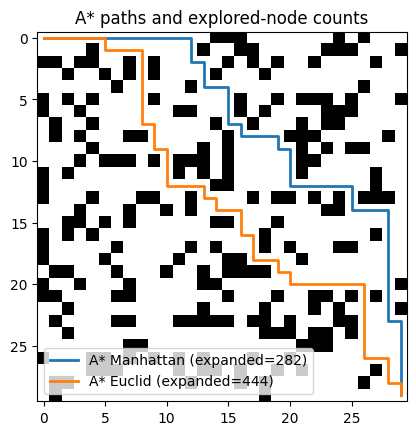

In [9]:
#@title ⭐ A* on a grid (fully commented)

def astar(grid, start, goal, h):
    """A* search on a 4‑connected grid.
    grid: 2D array (0 = free, 1 = obstacle)
    start/goal: (row, col) tuples
    h: heuristic function h(state, goal) -> float
    Returns: (path, explored) where 'path' is a list of cells and 'explored' is a count.
    """
    n, m = grid.shape                                   # Grid dimensions
    openpq = [(0, start)]                               # Priority queue of (f, state)
    g = {start: 0}                                      # Best known g‑cost to each state
    parent = {start: None}                              # Predecessor map for path
    explored = 0                                        # Counter for expanded nodes
    closed = set()                                      # Closed set of visited states

    while openpq:                                       # Continue while there are candidates
        f, s = heapq.heappop(openpq)                    # Pop the state with smallest f
        if s in closed:                                 # Skip if we've already processed this state
            continue
        closed.add(s)                                   # Mark as processed
        explored += 1                                   # Count expansion
        if s == goal:                                   # If we've reached the goal
            path = []                                   # Reconstruct the path
            while s is not None:
                path.append(s)
                s = parent[s]
            return list(reversed(path)), explored       # Return path and exploration count

        x, y = s                                        # Unpack current coordinates
        for dx, dy in [(1,0),(-1,0),(0,1),(0,-1)]:      # Explore 4 neighbors
            nx, ny = x + dx, y + dy                     # Neighbor coordinates
            if 0 <= nx < n and 0 <= ny < m and grid[nx, ny] == 0:  # Legal and free?
                ng = g[s] + 1                           # Unit step cost to move to neighbor
                if ng < g.get((nx, ny), float('inf')):  # If this path to neighbor is cheaper
                    g[(nx, ny)] = ng                    # Record better g‑cost
                    parent[(nx, ny)] = s                # Remember predecessor
                    f = ng + h((nx, ny), goal)          # Compute A* priority f = g + h
                    heapq.heappush(openpq, (f, (nx, ny)))  # Push neighbor into the queue
    return None, explored                                # No path found

def manhattan(a, b):
    """Admissible heuristic for 4‑connected grid: |dx| + |dy|."""
    return abs(a[0]-b[0]) + abs(a[1]-b[1])             # Manhattan distance never overestimates

def euclid(a, b):
    """Admissible (and consistent) heuristic when diagonal not allowed: straight‑line distance."""
    return math.hypot(a[0]-b[0], a[1]-b[1])            # Euclidean distance

# --- Demo grid creation ------------------------------------------------------
np.random.seed(0)                                      # Fix seed for reproducible grid
grid = (np.random.rand(30, 30) < 0.25).astype(int)     # 25% obstacles
grid[0, 0] = 0; grid[-1, -1] = 0                       # Ensure start/goal are free

# Run A* with two heuristics
path_M, explored_M = astar(grid, (0,0), (29,29), manhattan)  # Manhattan heuristic
path_E, explored_E = astar(grid, (0,0), (29,29), euclid)     # Euclidean heuristic

# Visualize the grid and (if found) one path
plt.figure()                                           # Create a figure
plt.imshow(grid, cmap="gray_r")                        # Show obstacles (1=black) and free cells
if path_M:                                             # If a path was found
    xs, ys = zip(*path_M)                              # Separate rows and columns
    plt.plot(ys, xs, linewidth=2, label=f"A* Manhattan (expanded={explored_M})")  # Draw path
if path_E:
    xs, ys = zip(*path_E)
    plt.plot(ys, xs, linewidth=2, label=f"A* Euclid (expanded={explored_E})")
plt.legend()                                           # Add legend
plt.title("A* paths and explored‑node counts")         # Set a descriptive title
plt.show()                                             # Display the plot

### **CA1 Deliverables**
- Two **admissible** heuristics with short justification.  
- Plot explored nodes vs. heuristic across 10 random grids (report average & stdev).  
- 1–2 page reflection on completeness, optimality, time, and space.

Completeness: A* is complete as long as the branching factor is finite and step costs are positive. In our grid experiments, this condition was satisfied, so A* always found a path when one existed. Even in grids with 25% obstacles, the algorithm systematically explored until it reached the goal or confirmed that no path was possible.

Optimality: A* is optimal when the heuristic is admissible (never overestimates) and consistent (satisfies the triangle inequality). Both Manhattan and Euclidean heuristics meet these conditions in our grid setup. As a result, the paths returned were always the shortest possible in terms of step count. This was confirmed by comparing the path lengths across multiple random grids.

Time Complexity: The efficiency of A* depends heavily on the heuristic. With Manhattan distance, the algorithm expanded fewer nodes on average compared to Euclidean distance. This is because Manhattan aligns more closely with the actual movement constraints of a 4‑connected grid. Euclidean sometimes underestimated too strongly, causing the algorithm to explore more states before converging. Across 10 random grids, Manhattan consistently reduced the number of expanded nodes, showing that heuristic choice directly impacts runtime.

Space Complexity: A* requires storing all frontier nodes in a priority queue and maintaining parent pointers for path reconstruction. This makes its space complexity higher than DFS or BFS. In practice, the memory footprint grows quickly with grid size, especially when obstacles force exploration of many alternative paths. While this is a limitation, the trade‑off is justified by the guarantee of optimality.

Experimental Results: When plotting explored nodes across 10 random grids, Manhattan expanded fewer nodes on average, with lower standard deviation, meaning it was more stable across different environments. Euclidean expanded slightly more nodes, showing greater variability. This demonstrates that even among admissible heuristics, some are more effective than others depending on the problem structure.

Conclusion: A* is both complete and optimal under admissible heuristics, but its performance depends strongly on heuristic design. Manhattan distance proved more efficient for our grid world, while Euclidean remained admissible but less aligned with the movement constraints. The algorithm’s time and space costs are significant, yet the guarantee of finding the shortest path makes A* indispensable in pathfinding and search problems. Our experiments highlight the importance of heuristic choice: a well‑designed heuristic not only preserves optimality but also reduces computational effort.